Ces expérimentations sont basées sur les ensembles de données small_dataset et large_dataset

In [1]:
from sklearn.svm import SVC
from IPython.display import display
from modAL.models import ActiveLearner
from modAL.uncertainty import margin_sampling
from modAL.uncertainty import entropy_sampling
from modAL.density import information_density
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import ActiveLearning as al
import Dataset_V2
import time
import csv

In [2]:
import Dataset_V2
small_dataset = Dataset_V2.loadAddressPair('smallDataSet.csv')
large_dataset = Dataset_V2.loadAddressPair('largeDataset.csv')

# Taille de l'ensemble d'entraînement initial + Stratégie d'échantillonnage 

In [3]:
def learning_multiSampling(data,classifier,nb_iterations,train_size,test_size):
    x_data = data.iloc[:,:39].values
    y_data = data['Label'].values
    X_train, y_train, X_dev, y_dev, X_test, y_test = al.train_dev_test_split(x_data, y_data, train_size,test_size)
    X_poolWithAdd = np.array(list(X_dev))
    X_dev = X_dev[:,:22].copy()
    X_train = X_train[:,:22].copy()
    X_test = X_test[:,:22].copy()
    perfMarge , traceMarge = al.autoAL(classifier, margin_sampling,nb_iterations, X_train,y_train,X_test, y_test,X_dev, y_dev, X_poolWithAdd)
    perfEntropy , traceEntropy = al.autoAL(classifier, entropy_sampling,nb_iterations, X_train,y_train,X_test, y_test,X_dev, y_dev, X_poolWithAdd)
    perfCosDensity , traceCosDensity = al.autoAL(classifier, al.cosineDensity_sampling,nb_iterations, X_train,y_train,X_test, y_test,X_dev, y_dev, X_poolWithAdd)
    perfEucDensity , traceEucDensity = al.autoAL(classifier, al.euclideanDensity_sampling,nb_iterations, X_train,y_train,X_test, y_test,X_dev, y_dev, X_poolWithAdd)
    perfRandom , traceRandom = al.autoAL(classifier, al.random_sampling,nb_iterations, X_train,y_train,X_test, y_test,X_dev, y_dev, X_poolWithAdd)
    print('Learning completed')
    return perfMarge, perfEntropy, perfCosDensity, perfEucDensity, perfRandom

In [5]:
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
test_size = 0.3

nbIterations_sd = 500
perfMar_005sd ,perfEnt_005sd,perfCD_005sd,perfED_005sd,perfRm_005sd = learning_multiSampling(small_dataset,classifier,nbIterations_sd,0.005,test_size)
perfMar_02sd ,perfEnt_02sd,perfCD_02sd,perfED_02sd,perfRm_02sd = learning_multiSampling(small_dataset,classifier,nbIterations_sd,0.02,test_size)
perfMar_05sd ,perfEnt_05sd,perfCD_05sd,perfED_05sd,perfRm_05sd = learning_multiSampling(small_dataset,classifier,nbIterations_sd,0.05,test_size)
perfMar_1sd ,perfEnt_1sd,perfCD_1sd,perfED_1sd,perfRm_1sd = learning_multiSampling(small_dataset,classifier,nbIterations_sd,0.1,test_size)

Learning completed
Learning completed
Learning completed
Learning completed


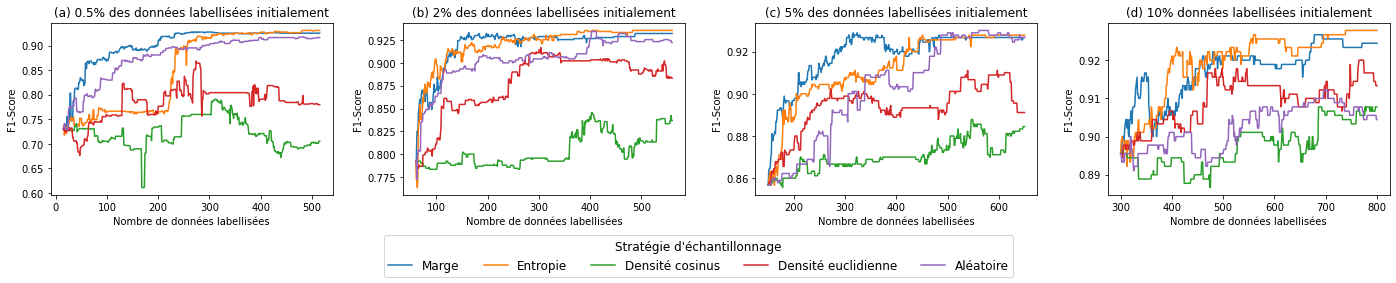

In [14]:
figure, axis = plt.subplots(1, 4,figsize=(24,4))

initial_labeledData = round(len(small_dataset)*0.005)
interval = range(initial_labeledData, initial_labeledData+nbIterations_sd+1)
axis[0].plot(interval, perfMar_005sd, label='Marge')
axis[0].plot(interval, perfEnt_005sd, label='Entropie')
axis[0].plot(interval, perfCD_005sd, label='Densité cosinus')
axis[0].plot(interval, perfED_005sd, label='Densité euclidienne')
axis[0].plot(interval, perfRm_005sd, label='Aléatoire')
axis[0].set_xlabel('Nombre de données labellisées')
axis[0].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.02)
interval = range(initial_labeledData, initial_labeledData+nbIterations_sd+1)
axis[1].plot(interval, perfMar_02sd, label='Marge')
axis[1].plot(interval, perfEnt_02sd, label='Entropie')
axis[1].plot(interval, perfCD_02sd, label='Densité cosinus')
axis[1].plot(interval, perfED_02sd, label='Densité euclidienne')
axis[1].plot(interval, perfRm_02sd, label='Aléatoire')
axis[1].set_xlabel('Nombre de données labellisées')
axis[1].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.05)
interval = range(initial_labeledData, initial_labeledData+nbIterations_sd+1)
axis[2].plot(interval, perfMar_05sd, label='Marge')
axis[2].plot(interval, perfEnt_05sd, label='Entropie')
axis[2].plot(interval, perfCD_05sd, label='Densité cosinus')
axis[2].plot(interval, perfED_05sd, label='Densité euclidienne')
axis[2].plot(interval, perfRm_05sd, label='Aléatoire')
axis[2].set_xlabel('Nombre de données labellisées')
axis[2].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.1)
interval = range(initial_labeledData, initial_labeledData+nbIterations_sd+1)
axis[3].plot(interval, perfMar_1sd, label='Marge')
axis[3].plot(interval, perfEnt_1sd, label='Entropie')
axis[3].plot(interval, perfCD_1sd, label='Densité cosinus')
axis[3].plot(interval, perfED_1sd, label='Densité euclidienne')
axis[3].plot(interval, perfRm_1sd, label='Aléatoire')
axis[3].set_xlabel('Nombre de données labellisées')
axis[3].set_ylabel('F1-Score')

axis[0].set_title('(a) 0.5% des données labellisées initialement')
axis[1].set_title('(b) 2% des données labellisées initialement')
axis[2].set_title('(c) 5% des données labellisées initialement')
axis[3].set_title('(d) 10% données labellisées initialement')

lines, labels = figure.axes[-1].get_legend_handles_labels()
figure.legend(lines, labels,loc = 'lower center', title='Stratégie d\'échantillonnage', 
              ncol=5, fontsize = 'large', title_fontsize='large')
plt.subplots_adjust(left=0.125,bottom=0.3, right=0.9, 
                    top=0.9, wspace=0.25, hspace=0.35)

plt.show()

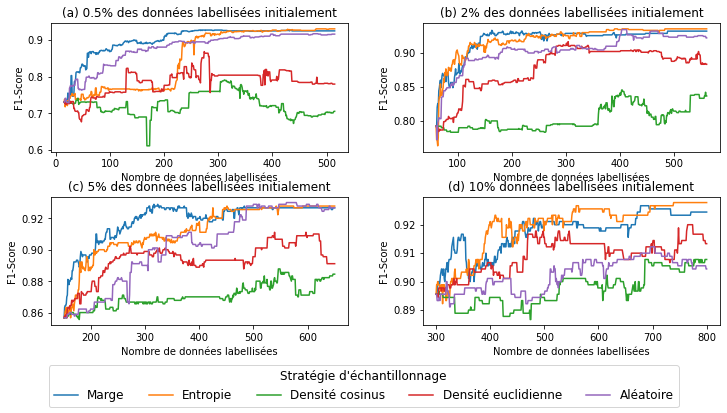

In [21]:
figure, axis = plt.subplots(2, 2,figsize=(12,6))

initial_labeledData = round(len(small_dataset)*0.005)
interval = range(initial_labeledData, initial_labeledData+nbIterations_sd+1)
axis[0,0].plot(interval, perfMar_005sd, label='Marge')
axis[0,0].plot(interval, perfEnt_005sd, label='Entropie')
axis[0,0].plot(interval, perfCD_005sd, label='Densité cosinus')
axis[0,0].plot(interval, perfED_005sd, label='Densité euclidienne')
axis[0,0].plot(interval, perfRm_005sd, label='Aléatoire')
axis[0,0].set_xlabel('Nombre de données labellisées')
axis[0,0].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.02)
interval = range(initial_labeledData, initial_labeledData+nbIterations_sd+1)
axis[0,1].plot(interval, perfMar_02sd, label='Marge')
axis[0,1].plot(interval, perfEnt_02sd, label='Entropie')
axis[0,1].plot(interval, perfCD_02sd, label='Densité cosinus')
axis[0,1].plot(interval, perfED_02sd, label='Densité euclidienne')
axis[0,1].plot(interval, perfRm_02sd, label='Aléatoire')
axis[0,1].set_xlabel('Nombre de données labellisées')
axis[0,1].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.05)
interval = range(initial_labeledData, initial_labeledData+nbIterations_sd+1)
axis[1,0].plot(interval, perfMar_05sd, label='Marge')
axis[1,0].plot(interval, perfEnt_05sd, label='Entropie')
axis[1,0].plot(interval, perfCD_05sd, label='Densité cosinus')
axis[1,0].plot(interval, perfED_05sd, label='Densité euclidienne')
axis[1,0].plot(interval, perfRm_05sd, label='Aléatoire')
axis[1,0].set_xlabel('Nombre de données labellisées')
axis[1,0].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.1)
interval = range(initial_labeledData, initial_labeledData+nbIterations_sd+1)
axis[1,1].plot(interval, perfMar_1sd, label='Marge')
axis[1,1].plot(interval, perfEnt_1sd, label='Entropie')
axis[1,1].plot(interval, perfCD_1sd, label='Densité cosinus')
axis[1,1].plot(interval, perfED_1sd, label='Densité euclidienne')
axis[1,1].plot(interval, perfRm_1sd, label='Aléatoire')
axis[1,1].set_xlabel('Nombre de données labellisées')
axis[1,1].set_ylabel('F1-Score')

axis[0,0].set_title('(a) 0.5% des données labellisées initialement')
axis[0,1].set_title('(b) 2% des données labellisées initialement')
axis[1,0].set_title('(c) 5% des données labellisées initialement')
axis[1,1].set_title('(d) 10% données labellisées initialement')

lines, labels = figure.axes[-1].get_legend_handles_labels()
figure.legend(lines, labels,loc = 'lower center', title='Stratégie d\'échantillonnage', 
              ncol=5, fontsize = 'large', title_fontsize='large')
plt.subplots_adjust(left=0.125,bottom=0.2, right=0.9, 
                    top=0.9, wspace=0.25, hspace=0.35)

plt.show()

In [7]:
nbIterations_ld = 200
perfMar_005ld ,perfEnt_005ld,perfCD_005ld,perfED_005ld,perfRm_005ld = learning_multiSampling(large_dataset,classifier,nbIterations_ld,0.005,test_size)
perfMar_02ld ,perfEnt_02ld,perfCD_02ld,perfED_02ld,perfRm_02ld = learning_multiSampling(large_dataset,classifier,nbIterations_ld,0.02,test_size)
perfMar_05ld ,perfEnt_05ld,perfCD_05ld,perfED_05ld,perfRm_05ld = learning_multiSampling(large_dataset,classifier,nbIterations_ld,0.05,test_size)
perfMar_1ld ,perfEnt_1ld,perfCD_1ld,perfED_1ld,perfRm_1ld = learning_multiSampling(large_dataset,classifier,nbIterations_ld,0.1,test_size)

Learning completed
Learning completed
Learning completed
Learning completed


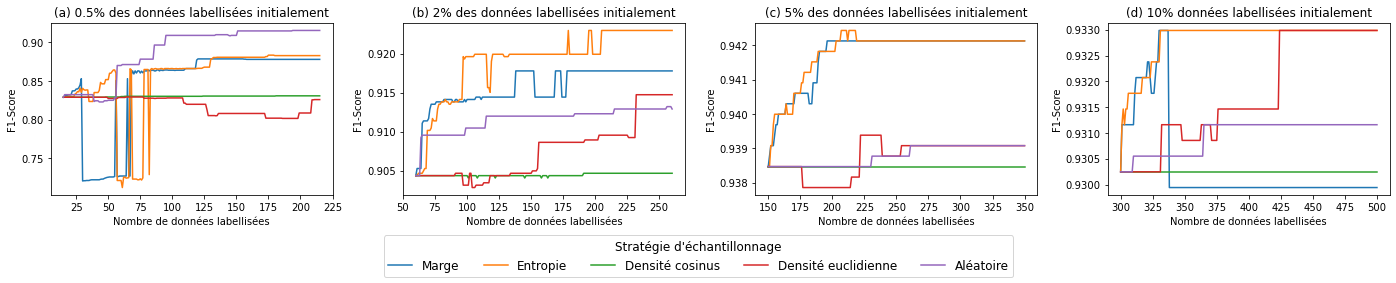

In [11]:
figure, axis = plt.subplots(1, 4,figsize=(24,4))

initial_labeledData = round(len(small_dataset)*0.005)
interval = range(initial_labeledData, initial_labeledData+nbIterations_ld+1)
axis[0].plot(interval, perfMar_005ld, label='Marge')
axis[0].plot(interval, perfEnt_005ld, label='Entropie')
axis[0].plot(interval, perfCD_005ld, label='Densité cosinus')
axis[0].plot(interval, perfED_005ld, label='Densité euclidienne')
axis[0].plot(interval, perfRm_005ld, label='Aléatoire')
axis[0].set_xlabel('Nombre de données labellisées')
axis[0].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.02)
interval = range(initial_labeledData, initial_labeledData+nbIterations_ld+1)
axis[1].plot(interval, perfMar_02ld, label='Marge')
axis[1].plot(interval, perfEnt_02ld, label='Entropie')
axis[1].plot(interval, perfCD_02ld, label='Densité cosinus')
axis[1].plot(interval, perfED_02ld, label='Densité euclidienne')
axis[1].plot(interval, perfRm_02ld, label='Aléatoire')
axis[1].set_xlabel('Nombre de données labellisées')
axis[1].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.05)
interval = range(initial_labeledData, initial_labeledData+nbIterations_ld+1)
axis[2].plot(interval, perfMar_05ld, label='Marge')
axis[2].plot(interval, perfEnt_05ld, label='Entropie')
axis[2].plot(interval, perfCD_05ld, label='Densité cosinus')
axis[2].plot(interval, perfED_05ld, label='Densité euclidienne')
axis[2].plot(interval, perfRm_05ld, label='Aléatoire')
axis[2].set_xlabel('Nombre de données labellisées')
axis[2].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.1)
interval = range(initial_labeledData, initial_labeledData+nbIterations_ld+1)
axis[3].plot(interval, perfMar_1ld, label='Marge')
axis[3].plot(interval, perfEnt_1ld, label='Entropie')
axis[3].plot(interval, perfCD_1ld, label='Densité cosinus')
axis[3].plot(interval, perfED_1ld, label='Densité euclidienne')
axis[3].plot(interval, perfRm_1ld, label='Aléatoire')
axis[3].set_xlabel('Nombre de données labellisées')
axis[3].set_ylabel('F1-Score')

axis[0].set_title('(a) 0.5% des données labellisées initialement')
axis[1].set_title('(b) 2% des données labellisées initialement')
axis[2].set_title('(c) 5% des données labellisées initialement')
axis[3].set_title('(d) 10% données labellisées initialement')

lines, labels = figure.axes[-1].get_legend_handles_labels()
figure.legend(lines, labels,loc = 'lower center', title='Stratégie d\'échantillonnage', ncol=5, fontsize = 'large', title_fontsize='large')

plt.subplots_adjust(left=0.125,bottom=0.3, right=0.9, 
                    top=0.9, wspace=0.25, hspace=0.35)

plt.show()

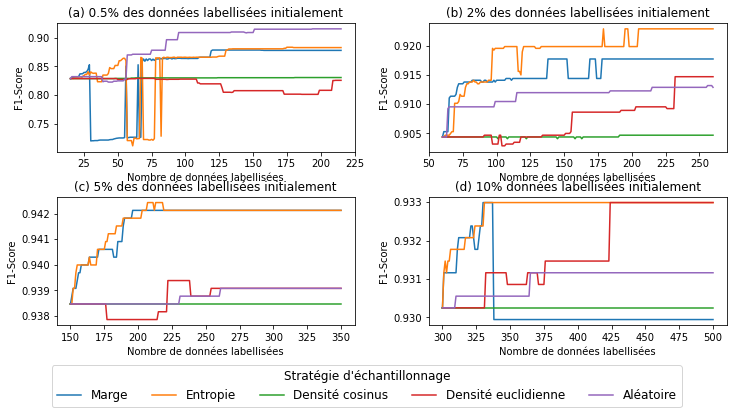

In [23]:
figure, axis = plt.subplots(2, 2,figsize=(12,6))

initial_labeledData = round(len(small_dataset)*0.005)
interval = range(initial_labeledData, initial_labeledData+nbIterations_ld+1)
axis[0,0].plot(interval, perfMar_005ld, label='Marge')
axis[0,0].plot(interval, perfEnt_005ld, label='Entropie')
axis[0,0].plot(interval, perfCD_005ld, label='Densité cosinus')
axis[0,0].plot(interval, perfED_005ld, label='Densité euclidienne')
axis[0,0].plot(interval, perfRm_005ld, label='Aléatoire')
axis[0,0].set_xlabel('Nombre de données labellisées')
axis[0,0].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.02)
interval = range(initial_labeledData, initial_labeledData+nbIterations_ld+1)
axis[0,1].plot(interval, perfMar_02ld, label='Marge')
axis[0,1].plot(interval, perfEnt_02ld, label='Entropie')
axis[0,1].plot(interval, perfCD_02ld, label='Densité cosinus')
axis[0,1].plot(interval, perfED_02ld, label='Densité euclidienne')
axis[0,1].plot(interval, perfRm_02ld, label='Aléatoire')
axis[0,1].set_xlabel('Nombre de données labellisées')
axis[0,1].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.05)
interval = range(initial_labeledData, initial_labeledData+nbIterations_ld+1)
axis[1,0].plot(interval, perfMar_05ld, label='Marge')
axis[1,0].plot(interval, perfEnt_05ld, label='Entropie')
axis[1,0].plot(interval, perfCD_05ld, label='Densité cosinus')
axis[1,0].plot(interval, perfED_05ld, label='Densité euclidienne')
axis[1,0].plot(interval, perfRm_05ld, label='Aléatoire')
axis[1,0].set_xlabel('Nombre de données labellisées')
axis[1,0].set_ylabel('F1-Score')

initial_labeledData = round(len(small_dataset)*0.1)
interval = range(initial_labeledData, initial_labeledData+nbIterations_ld+1)
axis[1,1].plot(interval, perfMar_1ld, label='Marge')
axis[1,1].plot(interval, perfEnt_1ld, label='Entropie')
axis[1,1].plot(interval, perfCD_1ld, label='Densité cosinus')
axis[1,1].plot(interval, perfED_1ld, label='Densité euclidienne')
axis[1,1].plot(interval, perfRm_1ld, label='Aléatoire')
axis[1,1].set_xlabel('Nombre de données labellisées')
axis[1,1].set_ylabel('F1-Score')

axis[0,0].set_title('(a) 0.5% des données labellisées initialement')
axis[0,1].set_title('(b) 2% des données labellisées initialement')
axis[1,0].set_title('(c) 5% des données labellisées initialement')
axis[1,1].set_title('(d) 10% données labellisées initialement')

lines, labels = figure.axes[-1].get_legend_handles_labels()
figure.legend(lines, labels,loc = 'lower center', title='Stratégie d\'échantillonnage', ncol=5, fontsize = 'large', title_fontsize='large')

plt.subplots_adjust(left=0.125,bottom=0.2, right=0.9, 
                    top=0.9, wspace=0.25, hspace=0.35)

plt.show()

# Temps d'éxécution

In [10]:
def learning_durations(data,classifier, nb_iterations,train_size,test_size):
    x_data = data.iloc[:,:39].values
    y_data = data['Label'].values
    X_train, y_train, X_dev, y_dev, X_test, y_test = al.train_dev_test_split(x_data, y_data, train_size,test_size)
    X_poolWithAdd = np.array(list(X_dev))
    X_dev = X_dev[:,:22].copy()
    X_train = X_train[:,:22].copy()
    X_test = X_test[:,:22].copy()
    samples = [margin_sampling,entropy_sampling,al.cosineDensity_sampling,al.euclideanDensity_sampling, al.random_sampling]
    durations = []
    for sampling in samples:
        start = time.time()
        al.autoAL(classifier, sampling,nb_iterations, X_train,y_train,X_test, y_test,X_dev, y_dev, X_poolWithAdd)
        duration = time.time() - start
        durations.append(duration)
    print("Durations:", durations, "for", nb_iterations, "iterations")
    return durations, samples

In [12]:
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
test_size = 0.3
train_size = 0.05

duration_100SD = learning_durations(small_dataset,classifier, 100,train_size,test_size)
duration_300SD = learning_durations(small_dataset,classifier, 300,train_size,test_size)
duration_700SD = learning_durations(small_dataset,classifier, 700,train_size,test_size)
duration_1000SD = learning_durations(small_dataset,classifier, 1000,train_size,test_size)

Durations: [3.220863103866577, 2.544840097427368, 12.482240915298462, 9.75613522529602, 1.4636502265930176] for 100 iterations
Durations: [20.712821006774902, 19.75265622138977, 42.22744154930115, 38.44258117675781, 10.91084599494934] for 300 iterations
Durations: [103.40449547767639, 83.40984773635864, 125.81488060951233, 104.10746097564697, 37.56789493560791] for 700 iterations
Durations: [209.67058563232422, 187.57660031318665, 191.31667351722717, 166.39155793190002, 84.68462562561035] for 1000 iterations


In [13]:
duration_50LD = learning_durations(large_dataset,classifier, 50,train_size,test_size)
duration_100LD = learning_durations(large_dataset,classifier, 100,train_size,test_size)
duration_200LD = learning_durations(large_dataset,classifier, 200,train_size,test_size)
duration_500LD = learning_durations(large_dataset,classifier, 500,train_size,test_size)

Durations: [6.173867225646973, 5.975659608840942, 85.89194536209106, 76.20304846763611, 3.698892116546631] for 50 iterations
Durations: [13.49303674697876, 14.633626222610474, 189.0161051750183, 139.77597093582153, 6.388788223266602] for 100 iterations
Durations: [29.438379049301147, 30.402222871780396, 450.1089472770691, 323.99670338630676, 17.93794012069702] for 200 iterations
Durations: [129.87240719795227, 109.37447357177734, 771.6907176971436, 550.1064863204956, 31.49939489364624] for 500 iterations


In [16]:
duration_300LD = learning_durations(large_dataset,classifier, 300,train_size,test_size)
duration_700LD = learning_durations(large_dataset,classifier, 700,train_size,test_size)

Durations: [42.52107310295105, 39.214353799819946, 435.10096883773804, 347.9685904979706, 18.320380449295044] for 300 iterations
Durations: [171.7498857975006, 179.19761562347412, 3512.0043420791626, 1093.3978304862976, 81.2832088470459] for 700 iterations


In [15]:
duration_1000LD = learning_durations(large_dataset,classifier, 1000,train_size,test_size)

Durations: [395.34113121032715, 396.74121713638306, 2021.2395124435425, 1234.5925073623657, 84.6745343208313] for 1000 iterations


# Afficher les paires labelliser dans un fichier csv 

In [17]:
def printPairsInCSV(fileName, data):
    selectedPairs = open(fileName, 'w',encoding='UTF8')
    obj = csv.writer(selectedPairs)
    obj.writerow(('INBUILDING_1','INBUILDING_2','EXTBUILDING_1','EXTBUILDING_2','POILOGISTIC_1', 'POILOGISTIC_2','ZONE_1', 
                  'ZONE_2','DISTRICT_1', 'DISTRICT_2','HOUSENUM_1','HOUSENUM_2','ROADNAME_1','ROADNAME_2', 'CITY_1','CITY_2',
                  'LABEL'))
    for row in data:
        toWrite = []
        for i in range (22, 30):
            toWrite.append(row[i])
            toWrite.append(row[i + 8])
        toWrite.append(row[38])
        obj.writerow(toWrite)
    selectedPairs.close()

In [18]:
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
nb_iterations= 200
test_size = 0.3
train_size = 0.05

x_data = small_dataset.iloc[:,:39].values
y_data = small_dataset['Label'].values
X_train, y_train, X_dev, y_dev, X_test, y_test = al.train_dev_test_split(x_data, y_data, train_size,test_size)
X_poolWithAdd = np.array(list(X_dev))
X_dev = X_dev[:,:22].copy()
X_train = X_train[:,:22].copy()
X_test = X_test[:,:22].copy()


perfMarge , traceMarge = al.autoAL(classifier, margin_sampling,nb_iterations, X_train,y_train,X_test, y_test,X_dev, y_dev, X_poolWithAdd)
printPairsInCSV('Results/Selection_marge200it.csv', traceMarge)

Convertion CSV to XLSX

In [ ]:
read_file = pd.read_csv (r'Results/Selection_marge200it.csv')
read_file.to_excel (r'Results/Selection_marge200it.xlsx', index = None, header=True)

In [ ]:
#read_file = pd.read_excel ("littleDataSet.xlsx") 
#read_file.to_csv ("littleDataSet.csv",index = None,header=True) 

# Validation 

In [8]:
import statistics as stats

def val_autoAL(classifier, sampleRequest, nbIterations, X_train, y_train,X_test, y_test, X_pool, y_pool, X_poolWithAdd):
    learner = ActiveLearner(estimator=classifier, 
                        query_strategy = sampleRequest,
                        X_training=X_train, 
                        y_training=y_train)
    for index in range(nbIterations):
        query_index, query_instance = learner.query(X_pool)
        X, y = X_pool[query_index], y_pool[query_index].reshape(1, )
        learner.teach(X=X, y=y)
        X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
        model_accuracy = learner.score(X_test, y_test)
    return model_accuracy, learner.score(X_pool, y_pool)

def test_train_split(data, labels,test_size):
    X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=test_size)
    return X_train, y_train, X_test, y_test

def dev_train_split(data, labels, train_size):
    X_train, X_dev, y_train, y_dev = train_test_split(data,labels, train_size=train_size)
    return X_train, y_train, X_dev, y_dev

In [16]:
classifier = SVC(C=1000, gamma=0.1, kernel='rbf', probability=True)
nb_iterations= 200
test_size = 0.3
train_size = 0.05

x_data = small_dataset.iloc[:,:39].values
y_data = small_dataset['Label'].values
X_rem, y_rem, X_test, y_test = test_train_split(x_data, y_data,test_size)


margeDiff = []
entropyDiff = []
for i in range(10):
    X_train, y_train, X_dev, y_dev = dev_train_split(X_rem, y_rem, train_size)
    X_poolWithAdd = np.array(list(X_dev))
    X_dev = X_dev[:,:22].copy()
    X_train = X_train[:,:22].copy()
    X_test = X_test[:,:22].copy()
    predictPerf_marge , realPerf_marge = val_autoAL(classifier, margin_sampling,nb_iterations, X_train,y_train,X_test, y_test,X_dev, y_dev, X_poolWithAdd)
    predictPerf_entropy , realPerf_entropy = val_autoAL(classifier, entropy_sampling,nb_iterations, X_train,y_train,X_test, y_test,X_dev, y_dev, X_poolWithAdd)
    margeDiff.append(abs(predictPerf_marge - realPerf_marge))
    entropyDiff.append(abs(predictPerf_entropy - realPerf_entropy))

print("Marge validity :", stats.mean(margeDiff))
print("Entropy validity :", stats.mean(entropyDiff))

Marge validity : 0.00843887341380375
Entropy validity : 0.003717734447539456
